In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
plt.rcParams["figure.figsize"] = (3,3)

print(time.ctime())

Mon Apr 27 11:31:49 2020


In [ ]:
# read a data file, store all data in arrays

#file1 = "FourIonsTelegraf_100s_W0028_H11-200211-013412-1_cent.csv"
file1 = "FourIons_100s_W0028_H11-200211-012037-1_cent.csv"
data=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4,5))

y   = data[:, 0]
x   = data[:, 1]
t   = data[:, 2]
a   = data[:, 3]
A   = data[:, 4]
n   = data[:, 5]

for i in range(0,20):
    print (i, x[i],y[i],t[i],a[i],A[i],n[i])
    
print (len(t), time.ctime())

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

In [ ]:
# select lists of photons which belong to a selected area on the sensor

x1 = []; y1 = []; t1 = []; a1 = []; n1 = []; tof1 = []; ID1 = []
x2 = []; y2 = []; t2 = []; a2 = []; n2 = []; tof2 = []; ID2 = []


# 20200411
px1min = 74;  px1max = 84; py1min = 95; py1max = 105; 
px2min = 85; px2max = 95; py2min = 95; py2max = 105; 

channel1 = []; channel2 = [];

nmin = 0

for i in range(len(x)-1):
    if (i-(i/1000000)*1000000 == 1): 
        print (i, time.ctime())
    if ( px1min < x[i] < px1max and py1min < y[i] < py1max and nmin < n[i]): 
        x1.append(x[i])
        y1.append(y[i])
        t1.append(t[i]/4096.*25)
#        ID1.append(ID[i])
        a1.append(a[i])
        n1.append(n[i])
#        tof1.append(tof[i]/4096.*25.)
        channel1.append(1)

    if ( px2min < x[i] < px2max and py2min < y[i] < py2max and nmin < n[i]): 
        x2.append(x[i])
        y2.append(y[i])
        t2.append(t[i]/4096.*25)
#        ID2.append(ID[i])
        a2.append(a[i])
        n2.append(n[i])
#        tof2.append(tof[i]/4096.*25.)
        channel2.append(2)

for j in range(1,10):
    print (j, x1[j],y1[j],t1[j],a1[j],n1[j]) #,tof1[j]

for j in range(1,10):
    print (j, x2[j],y2[j],t2[j],a2[j],n2[j]) #,tof2[j]

print (len(x1), len(x2))
time.ctime()
# for i in range(1,10):
#     print(channel[i])
# print(len(channel))
print(len(x))
print(len(x1) + len(x2))

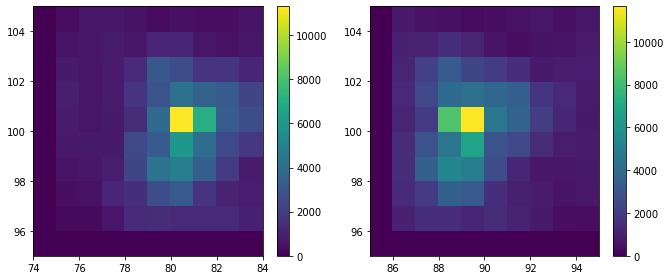

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(x1, y1, bins = 10, range = [(px1min, px1max), (py1min, py1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(x2, y2, bins = 10, range = [(px2min, px2max), (py2min, py2max)])
fig.colorbar(h[3], ax = ax1)
fig.tight_layout() 
plt.show()

In [21]:
# Preparations 
TimeChan1 = []; TimeChan2 = []; XChan1 = []; XChan2 = []; YChan1 = []; YChan2 = []; AChan1 = []; AChan2 = []
new_X = []; new_T = []; new_Y = []; new_A = []; new_C = []
T = t1 + t2
X = x1 + x2
Y = y1 + y2
A = a1 + a2
C = channel1 + channel2
print('Lenth of X, Y, T, and A: ' + str(len(X)) + ' ' + str(len(Y)) + ' ' + str(len(T)) + ' ' + str(len(A)))
#np.asarray(T)
sorting_key = np.argsort(T)
print('Sorting key is: ' + str(sorting_key))
for j in range(len(sorting_key)):
    new_X.append(X[sorting_key[j]])
    new_T.append(T[sorting_key[j]])
    new_Y.append(Y[sorting_key[j]])
    new_C.append(C[sorting_key[j]])
    new_A.append(A[sorting_key[j]])

    ####### T ########
for i in range(len(t1) + len(t2)):
    if (new_C[i] == 1):
        TimeChan1.append(new_T[i])
        TimeChan2.append(0)
    if (new_C[i] == 2):
        TimeChan1.append(0)
        TimeChan2.append(new_T[i])
        
################## Clean top of data #########################
trash = 0
if TimeChan1[0]==0:
    for i in range(len(TimeChan1)):
        if TimeChan1[i]!=0:
            break
        trash+=1
        
elif TimeChan2[0]==0:
    for i in range(len(TimeChan2)):
        if TimeChan2[i]!=0:
            break   
        trash+=1
print('# of elements to delete in the beginning: ' + str(trash))
#############################################################

        
print('Values of TimeChan 1 and 2 before :')    
for i in range(5):
    print(TimeChan1[i], TimeChan2[i])
        
for i in range(len(TimeChan1)):
    if(TimeChan1[i]==0):
        TimeChan1[i]=TimeChan1[i-1]   
    if(TimeChan2[i]==0):
        TimeChan2[i]=TimeChan2[i-1]  
        
print('Values of TimeChan 1 and 2 after :')    
for i in range(5):
    print(TimeChan1[i], TimeChan2[i])
      
        
    ####### A ########
for i in range(len(a1) + len(a2)):
    if (new_C[i] == 1):
        AChan1.append(new_A[i])
        AChan2.append(0)
    if (new_C[i] == 2):
        AChan1.append(0)
        AChan2.append(new_A[i])
        
for i in range(len(AChan1)):
    if(AChan1[i]==0):
        AChan1[i]=AChan1[i-1]   
    if(AChan2[i]==0):
        AChan2[i]=AChan2[i-1] 
    
    ####### X ########
for i in range(len(x1) + len(x2)):
    if (new_C[i] == 1):
        XChan1.append(new_X[i])
        XChan2.append(0)
    if (new_C[i] == 2):
        XChan1.append(0)
        XChan2.append(new_X[i])
        
for i in range(len(XChan1)):
    if(XChan1[i]==0):
        XChan1[i]=XChan1[i-1]   
    if(XChan2[i]==0):
        XChan2[i]=XChan2[i-1] 
        
    ####### Y ######## 
for i in range(len(y1) + len(y2)):
    if (new_C[i] == 1):
        YChan1.append(new_Y[i])
        YChan2.append(0)
    if (new_C[i] == 2):
        YChan1.append(0)
        YChan2.append(new_Y[i])
        
for i in range(len(YChan1)):
    if(YChan1[i]==0):
        YChan1[i]=YChan1[i-1]   
    if(YChan2[i]==0):
        YChan2[i]=YChan2[i-1] 
    
        
print('Length of TimeChan1: ' + str(len(TimeChan1)))
print('Length of TimeChan2: ' + str(len(TimeChan2)))
print('Length of XChan1: ' + str(len(XChan1)))
print('Length of XChan1: ' + str(len(XChan2)))
print('Length of AChan1: ' + str(len(AChan1)))
print('Length of AChan1: ' + str(len(AChan2)))
deltaT = []
TC1 = np.asarray(TimeChan1)
TC2 = np.asarray(TimeChan2)
dT = TC1 - TC2
for i in range(len(dT)-1):
    deltaT.append(dT[i])
print('Length of deltaT: ' + str(len(dT)))
print('done')
print('trash: ' + str(trash))

Lenth of X, Y, T, and A: 298295 298295 298295 298295
Sorting key is: [141285 141286      0 ... 298294 141283 141284]
# of elements to delete in the beginning: 2
Values of TimeChan 1 and 2 before :
0 1354605787.5
0 1354857400.0
1355069120.3125 0
0 1355106634.375
1355334464.0625 0
Values of TimeChan 1 and 2 after :
102617904357.8125 1354605787.5
102617904357.8125 1354857400.0
1355069120.3125 1354857400.0
1355069120.3125 1355106634.375
1355334464.0625 1355106634.375
Length of TimeChan1: 298295
Length of TimeChan2: 298295
Length of XChan1: 298295
Length of XChan1: 298295
Length of AChan1: 298295
Length of AChan1: 298295
Length of deltaT: 298295
done
trash: 2


In [22]:
## Fix data -- remove first few (n) points ##
n = trash  #  --> # of shitty points

for i in (range(n)):
    print(i)
    del TimeChan1[0]
    del TimeChan2[0]
    del XChan1[0]
    del XChan2[0]
    del YChan1[0]
    del YChan2[0]
    del AChan1[0]
    del AChan2[0]
print('Values of TimeChan 1 and 2 after :')    
for i in range(5):
    print(TimeChan1[i], TimeChan2[i])
    
deltaT1 = np.subtract(TimeChan2, TimeChan1)

0
1
Values of TimeChan 1 and 2 after :
1355069120.3125 1354857400.0
1355069120.3125 1355106634.375
1355334464.0625 1355106634.375
1355444914.0625 1355106634.375
1355444914.0625 1355455989.0625


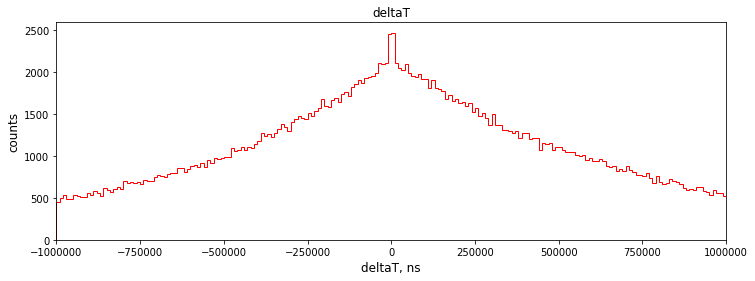

In [23]:
# Initial deltaT plot
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
Tlim = 1000000;
nbins = 200; 
ax0.hist(deltaT1, bins =nbins, range = (-Tlim, Tlim), color = 'r', histtype = 'step')
ax0.set_title("deltaT", fontsize = 12) # change the title
ax0.set_xlim(-Tlim,Tlim)
ax0.set_xlabel('deltaT, ns',fontsize = 12)
ax0.set_ylabel('counts',fontsize = 12)
#plt.yscale('log')
plt.show()

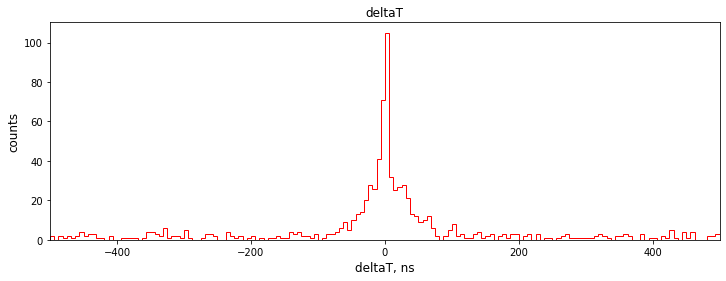

In [24]:
# Initial deltaT plot
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
Tlim = 500;
nbins = int(Tlim/1.5625*1./2.); 
ax0.hist(deltaT1, bins =nbins, range = (-Tlim, Tlim), color = 'r', histtype = 'step')
ax0.set_title("deltaT", fontsize = 12) # change the title
ax0.set_xlim(-Tlim,Tlim)
ax0.set_xlabel('deltaT, ns',fontsize = 12)
ax0.set_ylabel('counts',fontsize = 12)
#plt.yscale('log')
plt.show()

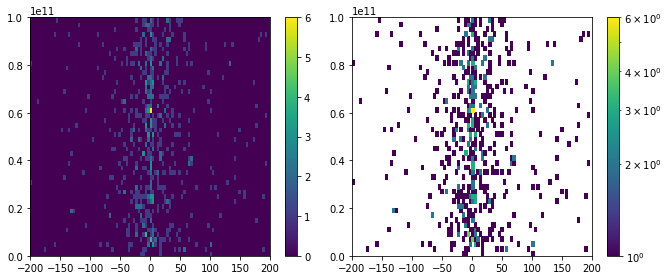

In [25]:
fig, (ax01, ax11) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax01.hist2d(deltaT1, TimeChan1, bins = [100,50], range = [(-200, 200),(0, 1.0e11)])
#h = ax01.hist2d(deltaT1, TimeChan1)
fig.colorbar(h[3], ax = ax01)

h = ax11.hist2d(deltaT1, TimeChan1, bins = [100,50], range = [(-200, 200),(0, 1.0e11)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax11)
fig.tight_layout()
plt.show()

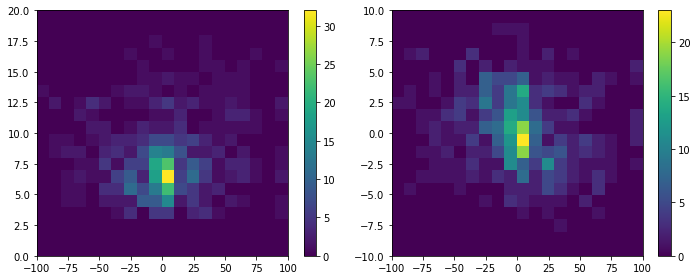

In [26]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

tlim = 100
deltaX = np.subtract(XChan2, XChan1)
h = ax0.hist2d(deltaT1, deltaX, bins = [20,20], range = [(-tlim,tlim),(0,20)])
fig.colorbar(h[3], ax = ax0)

deltaY = np.subtract(YChan2, YChan1)
h = ax1.hist2d(deltaT1, deltaY, bins = [20,20], range = [(-tlim,tlim),(-10,10)])
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

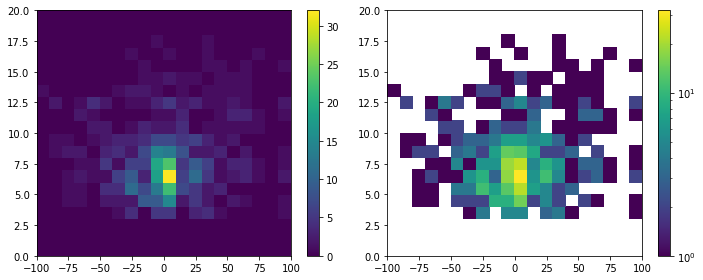

In [27]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

tlim = 100.
h = ax0.hist2d(deltaT1, deltaX, bins = [20,20], range = [(-tlim,tlim),(0,20)])
fig.colorbar(h[3], ax = ax0)
h = ax1.hist2d(deltaT1, deltaX, bins = [20,20], range = [(-tlim,tlim),(0,20)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

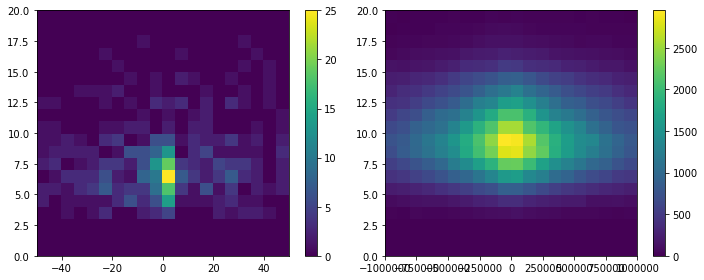

In [28]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

tlim = 50
h = ax0.hist2d(deltaT1, deltaX, bins = [20,20], range = [(-tlim,tlim),(0,20)])
fig.colorbar(h[3], ax = ax0)

tlim = 1e6
h = ax1.hist2d(deltaT1, deltaX, bins = [20,20], range = [(-tlim,tlim),(0,20)])
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

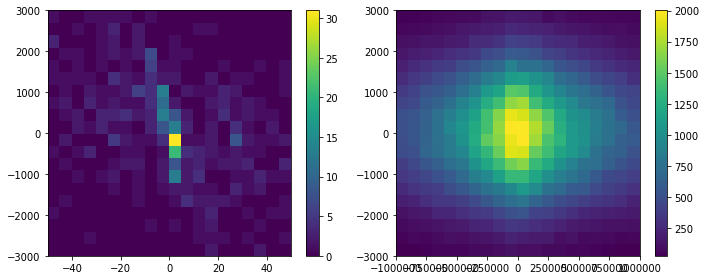

In [29]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

tlim = 50; alim = 3000
deltaA = np.subtract(AChan2, AChan1)
h = ax0.hist2d(deltaT1, deltaA, bins = [20,20], range = [(-tlim,tlim),(-alim, alim)])
fig.colorbar(h[3], ax = ax0)

tlim = 1e6
h = ax1.hist2d(deltaT1, deltaA, bins = [20,20], range = [(-tlim,tlim),(-alim, alim)])
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

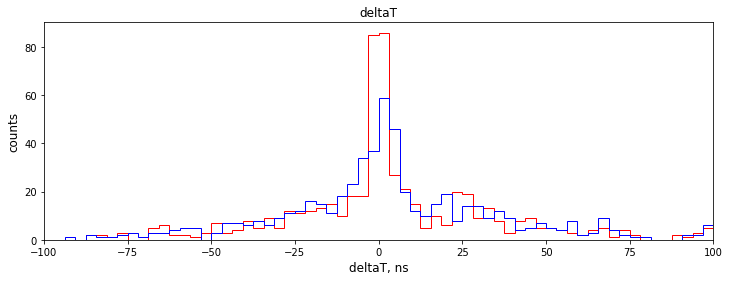

In [30]:
# Initial deltaT plot
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
Tlim = 100;
nbins = int(Tlim/1.5625);
deltaT1c = np.add(deltaT1,deltaA/200.)
ax0.hist(deltaT1c, bins =nbins, range = (-Tlim, Tlim), color = 'r', histtype = 'step')
ax0.hist(deltaT1, bins =nbins, range = (-Tlim, Tlim), color = 'b', histtype = 'step')

ax0.set_title("deltaT", fontsize = 12) # change the title
ax0.set_xlim(-Tlim,Tlim)
ax0.set_xlabel('deltaT, ns',fontsize = 12)
ax0.set_ylabel('counts',fontsize = 12)
#plt.yscale('log')
plt.show()